In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression

In [23]:
url = 'https://itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Hahn1.dat'
df = pd.read_csv(url, skiprows=60, sep=' ',skipinitialspace=True, names=['y0','x0','dummy'])
df.head()

,y0,x0,dummy
0,0.591,24.41,NaN
1,1.547,34.82,NaN
2,2.902,44.09,NaN
3,2.894,45.07,NaN
4,4.703,54.98,NaN


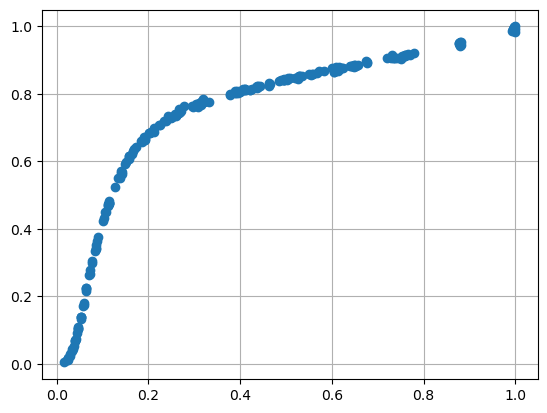

In [24]:
 # TODO 1
# x0 = ...
# y0 = ...
# x = x0/np.max(x0)
# y = y0/np.max(y0)
# plt.plot(...)
x0 = np.array(df['x0'])
y0 = np.array(df['y0'])
x = x0/np.max(x0)
y = y0/np.max(y0)
plt.plot(x,y,'o')
plt.grid()

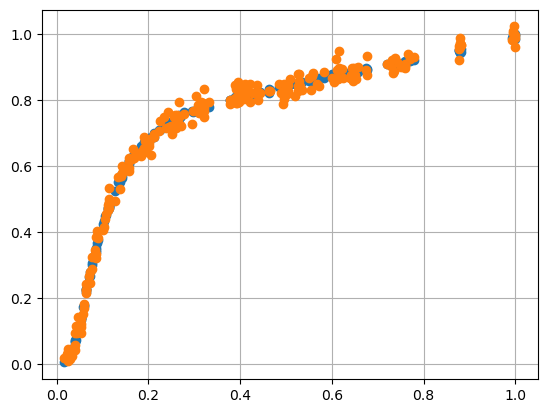

In [25]:
# TODO 2
# yn = y + ...
n = len(y0)
yn = y + np.random.normal(0,0.02,n)
plt.plot(x,y,'o')
plt.plot(x,yn,'o')
plt.grid()


In [26]:
from sklearn.model_selection import train_test_split
# TODO 3
# xtr, xts, ytr, yts = ...
xtr, xts, ytr, yts = train_test_split(x,yn,test_size=0.33)

In [27]:
def predict(w,x):
    # Get the length
    d = (len(w)-1)//2
    # TODO 4. Extract a and b from w
    4
    # a = ...
    # b = ...
    a = w[:d+1]
    b = w[d+1:]
    # TODO 5. Compute yhat. You may use the np.polyval function
    # But, remember you must flip the order the a and b
    # yhat = ...
    arev = a[::-1]
    brev = b[::-1]
    znum = np.polyval(arev,x)
    zden = 1+x*np.polyval(brev,x)
    yhat = znum/zden
    return yhat

In [28]:
d = 3
# TODO 6. Create the transformed feature matrix
# Z = ...
powd = np.arange(1,d+1)
Znum = xtr[:,None]**powd[None,:]
Zden = -ytr[:,None]*Znum
Z = np.hstack((Znum, Zden))
# TODO 7. Fit with parameters with linear regression
# regr = LinearRegression()
# regr.fit(...)
regr = LinearRegression()
regr.fit(Z,ytr)
# TODO 8
# Extract the parameters from regr.coef_ and regr.intercept_ and store the parameter vector in winit
# winit = ...
w0 = regr.coef_
a0 = regr.intercept_
winit = np.hstack((a0,w0))


In [29]:
print(Z[:5, :])

[[ 4.70050845e-02  2.20947797e-03  1.03856699e-04 -4.67717650e-03
  -2.19851077e-04 -1.03341184e-05]
 [ 3.11234016e-01  9.68666124e-02  3.01481848e-02 -2.36808922e-01
  -7.37029918e-02 -2.29388781e-02]
 [ 1.13197356e-01  1.28136413e-02  1.45047031e-03 -5.50273832e-02
  -6.22895426e-03 -7.05101150e-04]
 [ 1.50867181e-01  2.27609063e-02  3.43387377e-03 -8.92390757e-02
  -1.34632478e-02 -2.03116224e-03]
 [ 1.57384249e-01  2.47698017e-02  3.89837663e-03 -9.35616176e-02
  -1.47251249e-02 -2.31750272e-03]]


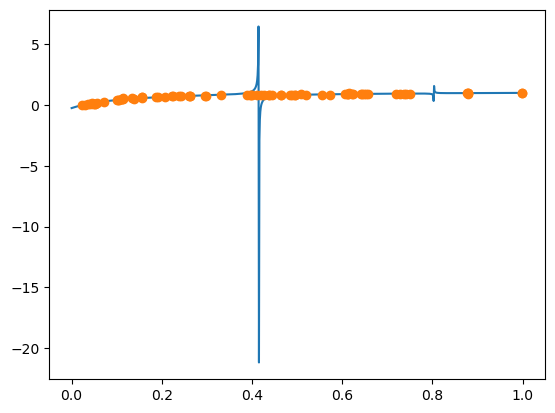

In [30]:
# TODO 9
# xp = ...
# yhat = ...
# plot(...)
xp = np.linspace(0,1,1000)
yhat = predict(winit,xp)
plt.plot(xp,yhat)
plt.plot(xts, yts, 'o')


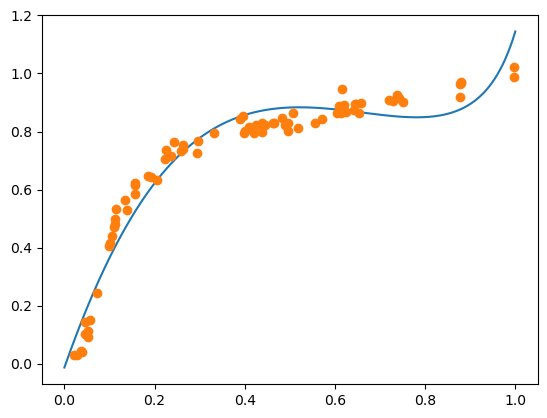

In [31]:
# TODO 10. Fit with parameters with linear regression
# regr = Ridge(alpha=1e-3)
# regr.fit(...)
regr = Ridge(alpha=1e-3)
regr.fit(Z,ytr)
# TODO 11
# Extract the parameters from regr.coef_ and regr.intercept_
6
# winit = ...
w0 = regr.coef_
a0 = regr.intercept_
winit = np.hstack((a0,w0))
# TODO 12
# Plot the results as above.
xp = np.linspace(0,1,1000)
yhat = predict(winit,xp)
plt.plot(xp,yhat)
plt.plot(xts, yts, 'o')

In [32]:
def feval(w,x,y):
# TODO 13. Parse w

# a = ...
# b = ...
    d = (len(w)-1)//2
    a = w[:d+1]
    b = w[d+1:]
    # TODO 14. Znum[i,j] = x[i]**j
    pow1 = np.arange(0,d+1)
    Znum = x[:,None]**pow1[None,:]
    # TODO 15. Zden[i,j] = x[i]**(j+1)
    pow2 = np.arange(1,d+1)
    Zden = x[:,None]**pow2[None,:]
    # TODO 16. Compute yhat
    # Compute the numerator and denominator
    rnum = Znum.dot(a)
    rden = Zden.dot(b)
    yhat = rnum/(1+rden)
    # TODO 17. Compute loss
    # f = ...
    e = yhat-y
    f = 0.5*np.sum(e**2)
    # TODO 18. Compute gradients
    # fgrad = ...
    eden = e/(1+rden)
    dJ_da = eden.dot(Znum)
    enum = -e*yhat/(1+rden)
    dJ_db = enum.dot(Zden)
    fgrad = np.hstack((dJ_da, dJ_db))
    return f, fgrad

In [33]:
 # TODO 19
w0 = winit
p = len(winit)
w1 = w0 + np.random.normal(0,1,p)*1e-6
f0, fgrad0 = feval(w0,xtr,ytr)
f1, fgrad1 = feval(w1,xtr,ytr)
print([f1-f0, fgrad0.dot(w1-w0)])


[5.644606006216524e-06, 5.643955141476809e-06]


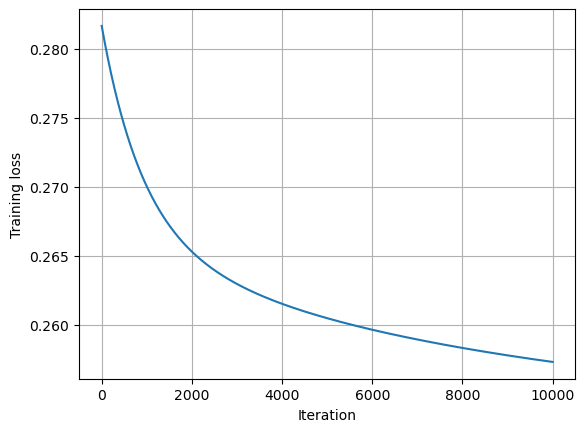

In [35]:
 # TODO 20
# fgd = ...
nit = 10000
step = 1e-6
w_gd = winit
fgd = np.zeros(nit)
for it in range(nit):
    ft, fgradt = feval(w_gd,xtr,ytr)
    fgd[it] = ft
    w_gd = w_gd - step*fgradt
    
plt.plot(fgd)
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.grid()